###Import lib and data

In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_excel (r'/content/drive/MyDrive/Document/Book1.xlsx') 
del data['id']
data.head()

,name,listening,reading,writing,speaking,overall
0,Lê Sử Triều An,3.5,3.5,2.5,4.5,3.5
1,Nguyễn Ngọc An,7.0,6.5,7.0,6.5,7.0
2,Huỳnh Gia An,6.0,6.5,6.5,6.0,6.5
3,Nguyễn Khánh An,6.0,6.5,5.5,6.5,6.0
4,Nguyễn Văn Bảo An,4.0,4.5,3.0,5.0,4.0


###Overview

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       508 non-null    object 
 1   listening  464 non-null    float64
 2   reading    464 non-null    float64
 3   writing    462 non-null    float64
 4   speaking   458 non-null    float64
 5   overall    441 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.9+ KB


In [ ]:
data.describe()

,listening,reading,writing,speaking,overall
count,464.000000,464.000000,462.000000,458.000000,441.000000
mean,4.506466,5.246767,3.995671,5.744541,4.979592
std,1.161831,1.194385,1.484914,1.153068,0.996946
min,0.000000,1.000000,1.000000,0.000000,1.000000
25%,4.000000,4.500000,3.000000,5.000000,4.500000
50%,4.500000,5.500000,4.000000,6.000000,5.000000
75%,5.500000,6.000000,5.000000,6.500000,5.500000
max,7.500000,8.500000,7.500000,8.500000,7.500000


###Score distribution

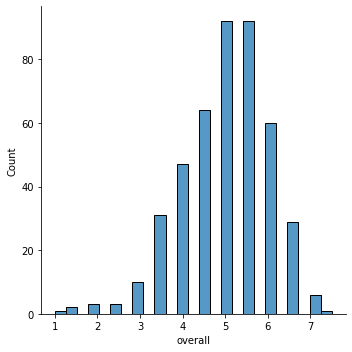

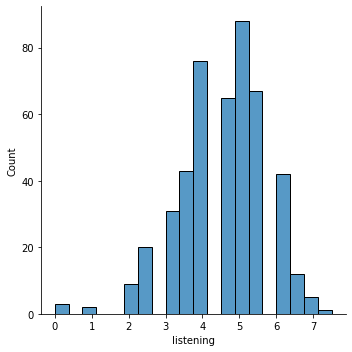

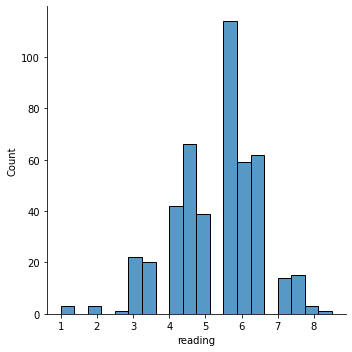

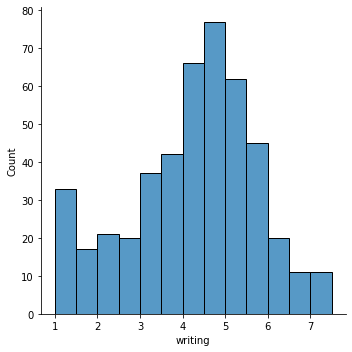

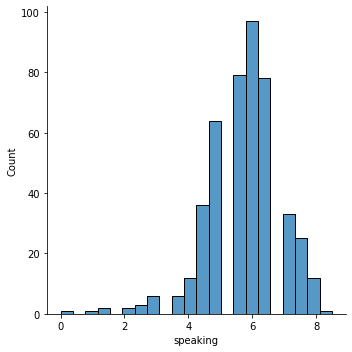

In [ ]:
sns.displot(data.overall.dropna())
sns.displot(data.listening.dropna())
sns.displot(data.reading.dropna())
sns.displot(data.writing.dropna())
sns.displot(data.speaking.dropna())

###Best result

In [ ]:
data.sort_values(by='overall', ascending=False).head()

,name,listening,reading,writing,speaking,overall
271,Nguyễn Trần Trọng Nhân,7.0,8.0,6.5,8.0,7.5
1,Nguyễn Ngọc An,7.0,6.5,7.0,6.5,7.0
30,Nguyễn Hoàng Gia Bảo,7.0,7.0,5.5,8.0,7.0
476,Nguyễn Hoàng Minh Châu,6.5,7.5,6.5,7.0,7.0
45,Nguyễn Ngọc Uyên Chi,6.0,8.0,5.0,8.0,7.0


In [ ]:
data[(data['reading'] >= 6.5) & (data['listening'] >= 6.5)]

,name,listening,reading,writing,speaking,overall
1,Nguyễn Ngọc An,7.0,6.5,7.0,6.5,7.0
19,Nguyễn Ngọc Quế Anh,7.0,8.0,5.0,6.5,6.5
30,Nguyễn Hoàng Gia Bảo,7.0,7.0,5.5,8.0,7.0
57,Võ Nam Đăng,6.5,7.5,5.0,6.5,6.5
67,Dương Tấn Đạt,6.5,6.5,5.0,7.5,6.5
170,Lê Minh Khôi,6.5,7.0,4.5,7.5,6.5
176,Mai Đình Khôi,6.5,7.5,4.5,6.5,6.5
236,Nguyễn Như Hoài Nam,6.5,6.5,3.0,7.5,6.0
271,Nguyễn Trần Trọng Nhân,7.0,8.0,6.5,8.0,7.5
307,Đoàn Trần Thiên Phúc,6.5,8.5,5.0,5.5,6.5


###No skill under 6

In [ ]:
data[(data['reading'] >= 6) & (data['listening'] >= 6) & (data['writing'] >= 6) & (data['speaking'] >= 6)]

,name,listening,reading,writing,speaking,overall
1,Nguyễn Ngọc An,7.0,6.5,7.0,6.5,7.0
2,Huỳnh Gia An,6.0,6.5,6.5,6.0,6.5
61,Tăng Tuấn Đạt,6.0,7.5,6.0,6.5,6.5
99,Lê Thanh Hà,6.0,7.0,6.0,7.0,6.5
113,Trần Minh Hiền,6.0,6.5,6.0,7.0,6.5
271,Nguyễn Trần Trọng Nhân,7.0,8.0,6.5,8.0,7.5
297,Phạm Thịnh Phát,6.0,7.5,6.5,7.0,7.0
317,Nguyễn Lê Khánh Phương,6.5,6.0,6.0,6.5,6.5
356,Phạm Đức Thắng,6.0,6.5,6.5,7.5,6.5
376,Trần Phước Thịnh,7.5,6.5,7.0,7.0,7.0


###Only focus on L and R

In [ ]:
data2 = data[(data['reading'] > data['writing']) & (data['reading'] > data['speaking']) & (data['listening'] >= data['writing']) & (data['listening'] >= data['speaking'])]
data2

,name,listening,reading,writing,speaking,overall
8,Bùi Khánh An,5.0,5.5,5.0,5.0,5.0
10,Nguyễn Ngọc Hữu Ân,2.5,4.0,1.0,2.5,2.5
11,Trương Gia Ân,3.0,3.0,1.0,1.0,2.0
19,Nguyễn Ngọc Quế Anh,7.0,8.0,5.0,6.5,6.5
31,Dương Danh Gia Bảo,6.0,7.0,4.5,4.5,5.5
36,Đặng Thanh Bình,4.0,4.5,3.0,3.0,3.5
54,Phạm Huỳnh Bảo Đại,5.0,6.0,4.5,4.5,5.0
57,Võ Nam Đăng,6.5,7.5,5.0,6.5,6.5
58,Trần Minh Đăng,3.5,5.0,2.5,3.5,3.5
66,Nguyễn Thành Đạt,5.0,5.5,4.5,4.5,5.0


In [ ]:
len(data2)/len(data)*100

7.677165354330709

###Boxplot

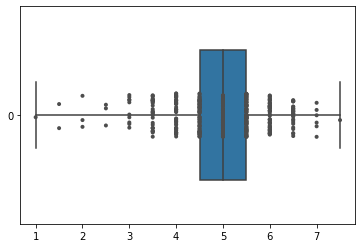

In [91]:
sns.boxplot(data=data.overall.dropna(), orient='h', whis=[0, 100], width=.6)
sns.stripplot(data=data.overall.dropna(), orient='h', size=4, color=".3", linewidth=0)

##Predict Overall based on L, R, W, S

In [160]:
#Clear missing rows
df = data.dropna(axis = 'rows')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441 entries, 0 to 507
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       441 non-null    object 
 1   listening  441 non-null    float64
 2   reading    441 non-null    float64
 3   writing    441 non-null    float64
 4   speaking   441 non-null    float64
 5   overall    441 non-null    float64
dtypes: float64(5), object(1)
memory usage: 24.1+ KB


In [58]:
X = df.copy(deep=True)
del X['name']
del X['overall']
X.head()

,listening,reading,writing,speaking
0,3.5,3.5,2.5,4.5
1,7.0,6.5,7.0,6.5
2,6.0,6.5,6.5,6.0
3,6.0,6.5,5.5,6.5
4,4.0,4.5,3.0,5.0


In [57]:
y = df.copy(deep=True)
del y['name']
del y['reading']
del y['listening']
del y['writing']
del y['speaking']
y.head()

,overall
0,3.5
1,7.0
2,6.5
3,6.0
4,4.0


In [50]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

In [51]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [[0.2492965  0.25613915 0.24326566 0.26111033]]
Mean squared error: 0.02
Coefficient of determination: 0.96


In [53]:
regr.predict([[8.5, 8.5, 7, 6]])

array([[7.56711856]])

#Predict L and R based on W and S

**Prepare data**

In [78]:
X = df.copy(deep=True)
del X['name']
del X['reading']
del X['listening']
del X['overall']
X.head()

,writing,speaking
0,2.5,4.5
1,7.0,6.5
2,6.5,6.0
3,5.5,6.5
4,3.0,5.0


In [79]:
y = df.copy(deep=True)
del y['name']
del y['writing']
del y['speaking']
del y['overall']
y.head()

,listening,reading
0,3.5,3.5
1,7.0,6.5
2,6.0,6.5
3,6.0,6.5
4,4.0,4.5


In [80]:
# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

**Linear model**

In [117]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred, multioutput='variance_weighted'))

Coefficients: 
 [[0.24694295 0.44965043]
 [0.26434638 0.32665358]]
Mean squared error: 0.70
Coefficient of determination: 0.11


In [118]:
regr.predict([[6.5, 7]])

array([[5.73380099, 6.3566892 ]])

**Polynomial model**

In [157]:
degree = 4
scaler = preprocessing.StandardScaler()
polyreg = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())

# Train the model using the training sets
polyreg.fit(X=X_train, y=y_train)

# Make predictions using the testing set
y_pred = polyreg.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred, multioutput='variance_weighted'))

Mean squared error: 0.69
Coefficient of determination: 0.13


In [159]:
polyreg.predict([[7, 6]])

array([[4.96834388, 5.89860332]])